In [1]:
import glob 
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cf
import intake
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import easygems.healpix as egh
import os

savedir = '/home/users/train045/Documents/WCRP25_hackathon/figs/D4/'

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [69]:
output_dir = f'/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/'

model = 'icon'
zoom = 10

ddir = output_dir + f'{model}_zoom{zoom}/'

In [70]:
glob.glob(ddir + '*/*')

['/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-02-01T0030.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-02-01T0045.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-08-01T0030.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-08-01T0045.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-02-01T0015.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-08-01T0015.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-02-01T0315.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-02-01T0330.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-02-01T0630.zarr',
 '/work/scratch-nopw2/train045/extreme_updrafts-aug_feb/icon_zoom10/count_1ms/2020-02-01T06

In [71]:
p = 5
aug_files = sorted(glob.glob(ddir + f'count_{p}ms/2020-08-01**00.*'))
if model == 'icon':
    feb_files = sorted(glob.glob(ddir + f'count_{p}ms/2020-02-01*00.*'))
else:
    feb_files = sorted(glob.glob(ddir + f'count_{p}ms/2021-02-01*'))
def get_count(files):
    li = []
    for f in files:
        d = xr.open_zarr(f)
        li.append(d)
    return sum(li)
aug = get_count(aug_files)
feb = get_count(feb_files)

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


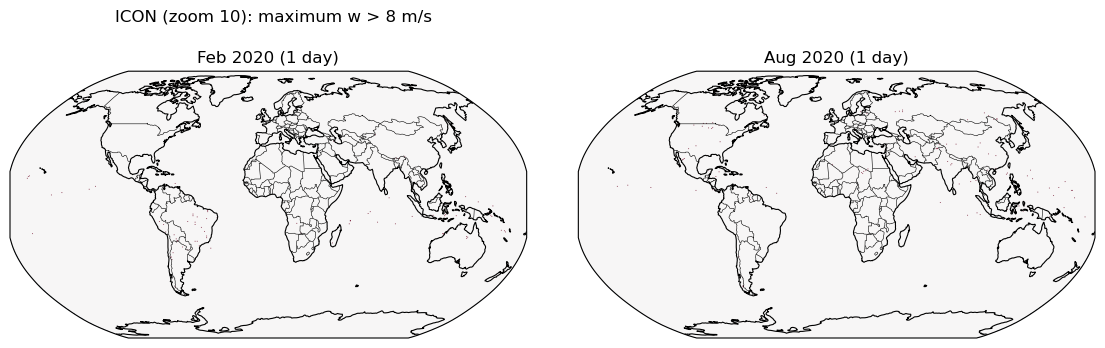

In [53]:
# view one instant of max updrafts

# Oxford coods (51 N, 15 W)
cmap = plt.get_cmap('RdBu_r')
cmap.set_under = 'white'

projection = ccrs.Robinson(central_longitude=0)
fig, axs = plt.subplots(1,2, figsize=(14,6), subplot_kw={'projection': projection}, )

for ax in axs:
    ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)

ax = axs[0]
shw = egh.healpix_show(feb.wa, ax=ax, cmap=cmap,vmin=-1,vmax=1)
if model == 'icon':
    ax.set_title('Feb 2020 (1 day)')
else:
    ax.set_title('Feb 2021 (8 days)')
ax = axs[1]
shw = egh.healpix_show(aug.wa, ax=ax, cmap=cmap,vmin=-1,vmax=1)
if model == 'icon':
    ax.set_title('Aug 2020 (1 day)')
else:
    ax.set_title('Aug 2020 (8 days)')

fig.subplots_adjust(wspace=.1)
fig.text(0.2,.8, f'{model.upper()} (zoom {zoom}): maximum w > {p} m/s', fontsize=12,)
fig.savefig(savedir + f'feb_aug-where_are_most_extreme_{p}ms_{model}_z{zoom}-1week.jpg', dpi=100, bbox_inches='tight')

In [54]:
# as a satter plot

In [72]:
feb = feb.compute()
aug = aug.compute()

In [73]:
flats = feb.lat.where(feb.wa>0).dropna('cell')
flons = feb.lon.where(feb.wa>0).dropna('cell')
alats = aug.lat.where(aug.wa>0).dropna('cell')
alons = aug.lon.where(aug.wa>0).dropna('cell')

In [ ]:
# plot scatter

cmap = 'Reds'

projection = ccrs.Robinson(central_longitude=0)
fig, axs = plt.subplots(1,2, figsize=(14,6), subplot_kw={'projection': projection}, )

for ax in axs:
    ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)

ax = axs[0]
ax.scatter(flons,flats, marker='.', s=1, c='darkred', lw=.5, transform=ccrs.PlateCarree())
# shw = egh.healpix_show(feb.wa, ax=ax, cmap=cmap, vmin=0,vmax=1)

if model == 'icon':
    ax.set_title('Feb 2020 (1 day)')
else:
    ax.set_title('Feb 2021 (1 day)')
    
ax = axs[1]
ax.scatter(alons,alats, marker='.', s=1, c='darkred', lw=.5, transform=ccrs.PlateCarree())
if model == 'icon':
    ax.set_title('Aug 2020 (1 day)')
else:
    ax.set_title('Aug 2020 (1 day)')

fig.subplots_adjust(wspace=.1)
letter = 'A' if model == 'ral3' else 'B'
fig.text(0.15,.77, f'({letter}) {model.upper()} (zoom {zoom}): maximum w > {p} m/s', fontsize=12,)
fig.savefig(savedir + f'scat_feb_aug-where_are_most_extreme_{p}ms_{model}_z{zoom}-1day.jpg', dpi=100, bbox_inches='tight')

In [6]:
# level at which max occurs

In [25]:
p = 1
aug_files = sorted(glob.glob(ddir + f'level_{p}ms/2020-08*'))
if model == 'icon':
    feb_files = sorted(glob.glob(ddir + f'level_{p}ms/2020-02*'))
else:
    feb_files = sorted(glob.glob(ddir + f'level_{p}ms/2021-02*'))
def get_level(files):
    li = []
    for f in files:
        d = xr.open_zarr(f)
        li.append(d)
    return xr.concat(li, dim='time').mean('time')
aug = get_level(aug_files)
feb = get_level(feb_files)

if model == 'icon':
    aug = aug / 100
    feb = feb / 100

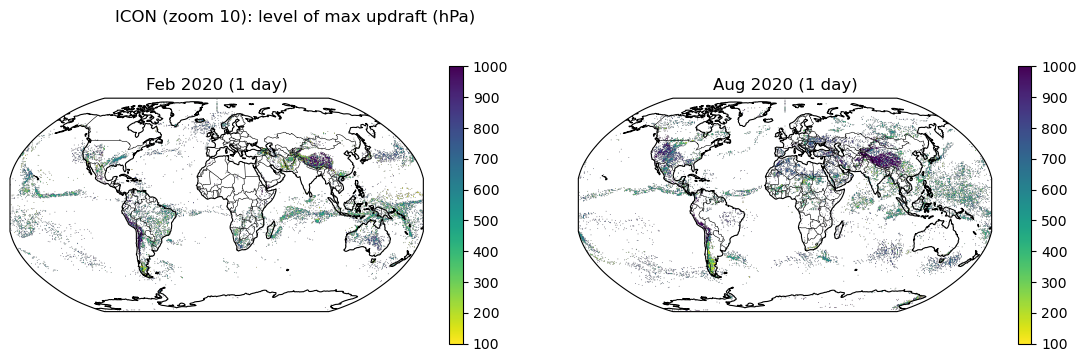

In [26]:
# view one instant of max updrafts

# Oxford coods (51 N, 15 W)
cmap = plt.get_cmap('viridis_r')

projection = ccrs.Robinson(central_longitude=0)
fig, axs = plt.subplots(1,2, figsize=(14,6), subplot_kw={'projection': projection}, )

for ax in axs:
    ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)

ax = axs[0]
shw = egh.healpix_show(feb.pressure, ax=ax, cmap=cmap, )
if model == 'icon':
    ax.set_title('Feb 2020 (1 day)')
else:
    ax.set_title('Feb 2021 (8 days)')
fig.colorbar(shw, shrink=.6)

ax = axs[1]
shw = egh.healpix_show(aug.pressure, ax=ax, cmap=cmap,)
if model == 'icon':
    ax.set_title('Aug 2020 (1 day)')
else:
    ax.set_title('Aug 2020 (8 days)')
fig.colorbar(shw, shrink=.6)

fig.subplots_adjust(wspace=.1)
fig.text(0.2,.8, f'{model.upper()} (zoom {zoom}): level of max updraft (hPa)', fontsize=12,)
fig.savefig(savedir + f'feb_aug-what_level_{p}ms_{model}_z{zoom}-1week.jpg', dpi=100, bbox_inches='tight')

### checks

In [27]:
def print_pi(model, z):
    file = f'/work/scratch-nopw2/train045/percentiles-aug_feb/{model}_zoom{z}/aug_feb_pi99.0.npy'
    pi = np.load(file)
    print(model, 'zoom', z, pi, 'm/s')

In [38]:
model = 'ral3'
print_pi(model, 9)
# print_pi(model, 10)

ral3 zoom 9 0.20563822984695435 m/s
